In [517]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [345]:
data = pd.read_csv('HW6.csv', delimiter=';')[['x2_2', 'x3_2', 'x4_2', 'y_2']].dropna()
data = data.rename(columns={'x2_2': 'x2', 'x3_2': 'x3', 'x4_2': 'x4', 'y_2': 'y'})
data

,x2,x3,x4,y
0,36.4,35.1,33.18,59.80333
1,28.2,19.2,20.36,10.78000
2,32.1,22.4,22.82,34.96333
3,26.1,35.6,33.28,35.87333
4,44.5,19.1,20.28,25.14667
5,24.6,21.5,22.30,33.84333
6,40.0,31.1,29.88,34.04667
7,31.1,26.1,25.98,28.09000
8,34.8,32.0,30.70,48.36333
9,29.0,38.7,35.96,20.19333


In [346]:
X = data[['x2', 'x3', 'x4']]
y = data['y']

In [347]:
X

,x2,x3,x4
0,36.4,35.1,33.18
1,28.2,19.2,20.36
2,32.1,22.4,22.82
3,26.1,35.6,33.28
4,44.5,19.1,20.28
5,24.6,21.5,22.30
6,40.0,31.1,29.88
7,31.1,26.1,25.98
8,34.8,32.0,30.70
9,29.0,38.7,35.96


In [348]:
y

0     59.80333
1     10.78000
2     34.96333
3     35.87333
4     25.14667
5     33.84333
6     34.04667
7     28.09000
8     48.36333
9     20.19333
10    45.76000
11    35.83333
12    28.99333
13    24.89333
14    29.86000
15    42.08333
16    28.26333
17    28.97333
18    20.66000
19    31.08000
20    33.76667
21    42.90000
22    28.27000
23    28.30333
24    13.49333
25    31.80667
26    13.08667
27    27.32667
28    54.32667
29    33.19667
30    15.55667
31    27.35333
32    31.20000
33    32.24667
34    25.08333
35    47.10667
36    26.48333
37    52.80666
38    26.74667
39    36.38667
Name: y, dtype: float64

Используя библиотеку <b>pandas</b> построим корреляционную матрицу по столбцам <b>x2</b>, <b>x3</b> и <b>x4</b>.

In [349]:
df = pd.DataFrame([data.x2, data.x3, data.x4]).transpose()
print(df.corr())

          x2        x3        x4
x2  1.000000 -0.178359 -0.176805
x3 -0.178359  1.000000  0.999935
x4 -0.176805  0.999935  1.000000


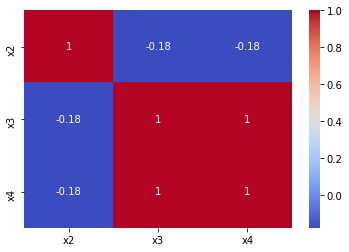

In [350]:
sn.heatmap(df.corr(), cmap=cm.coolwarm, annot=True)
plt.show()

* `x2` и `x3` слабо коррелируют (коэффициент корреляции равен `-0.178359`)
* `x2` и `x4` слабо коррелируют (коэффициент корреляции равен `-0.176805`)
* `x3` и `x4` сильно коррелируют (коэффициент корреляции равен `0.999935`, практически `1`)

Таким образом, мы убедились в том, что два признака (объясняющие переменные) действительно почти линейно зависимы.

<h2>Метод наименьших квадратов</h2>

Согласно МНК для множественной регрессии имеем формулу для оценки коэффициентов: 
\begin{equation*}
\beta = (X^T\cdot X)^{-1}\cdot X^T \cdot y
\end{equation*}

В нашем случае `y = X * beta + eps = beta1 + beta2 * x2 + beta3 * x3 + beta4 * x4`.

Разделим выборку на обучающую и тестовую выборки:

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1514)

In [352]:
X_train

,x2,x3,x4
25,22.4,34.0,32.20
30,35.4,31.5,30.10
18,28.8,18.6,19.88
15,31.4,31.7,30.46
16,19.3,36.0,33.90
4,44.5,19.1,20.28
11,34.0,22.0,22.60
22,30.2,24.5,24.70
38,38.1,23.4,23.72
10,34.9,37.9,35.32


In [353]:
y_train

25    31.80667
30    15.55667
18    20.66000
15    42.08333
16    28.26333
4     25.14667
11    35.83333
22    28.27000
38    26.74667
10    45.76000
5     33.84333
31    27.35333
9     20.19333
26    13.08667
23    28.30333
39    36.38667
34    25.08333
33    32.24667
19    31.08000
20    33.76667
24    13.49333
0     59.80333
3     35.87333
35    47.10667
7     28.09000
28    54.32667
6     34.04667
1     10.78000
12    28.99333
14    29.86000
Name: y, dtype: float64

In [354]:
X_test

,x2,x3,x4
8,34.8,32.0,30.70
21,42.8,20.9,21.72
27,33.6,30.0,29.00
37,29.0,35.3,33.24
2,32.1,22.4,22.82
17,25.9,27.0,26.60
29,27.6,24.4,24.42
36,20.9,40.2,37.06
13,35.5,24.7,24.76
32,38.1,34.8,32.84


In [355]:
y_test

8     48.36333
21    42.90000
27    27.32667
37    52.80666
2     34.96333
17    28.97333
29    33.19667
36    26.48333
13    24.89333
32    31.20000
Name: y, dtype: float64

In [356]:
X_train.index = np.arange(len(X_train))
X_test.index = np.arange(len(X_test))

Подготовим матрицы признаков для вычисления коэффициентов `beta`:

In [357]:
X_train = np.matrix(pd.concat([pd.Series(np.ones(X_train.shape[0], dtype=int)), X_train], axis=1))
X_test = np.matrix(pd.concat([pd.Series(np.ones(X_test.shape[0], dtype=int)), X_test], axis=1))

In [358]:
X_train

matrix([[ 1.  , 22.4 , 34.  , 32.2 ],
        [ 1.  , 35.4 , 31.5 , 30.1 ],
        [ 1.  , 28.8 , 18.6 , 19.88],
        [ 1.  , 31.4 , 31.7 , 30.46],
        [ 1.  , 19.3 , 36.  , 33.9 ],
        [ 1.  , 44.5 , 19.1 , 20.28],
        [ 1.  , 34.  , 22.  , 22.6 ],
        [ 1.  , 30.2 , 24.5 , 24.7 ],
        [ 1.  , 38.1 , 23.4 , 23.72],
        [ 1.  , 34.9 , 37.9 , 35.32],
        [ 1.  , 24.6 , 21.5 , 22.3 ],
        [ 1.  , 28.8 , 37.8 , 35.24],
        [ 1.  , 29.  , 38.7 , 35.96],
        [ 1.  , 22.8 , 17.8 , 19.24],
        [ 1.  , 33.5 , 17.9 , 19.42],
        [ 1.  , 27.1 , 28.7 , 27.96],
        [ 1.  , 16.3 , 34.4 , 32.42],
        [ 1.  , 31.8 , 40.  , 37.  ],
        [ 1.  , 32.3 , 31.5 , 30.2 ],
        [ 1.  , 25.4 , 36.7 , 34.36],
        [ 1.  , 30.1 , 29.5 , 28.6 ],
        [ 1.  , 36.4 , 35.1 , 33.18],
        [ 1.  , 26.1 , 35.6 , 33.28],
        [ 1.  , 24.3 , 36.7 , 34.36],
        [ 1.  , 31.1 , 26.1 , 25.98],
        [ 1.  , 39.4 , 41.9 , 38.52],
        [ 1.

In [359]:
X_test

matrix([[ 1.  , 34.8 , 32.  , 30.7 ],
        [ 1.  , 42.8 , 20.9 , 21.72],
        [ 1.  , 33.6 , 30.  , 29.  ],
        [ 1.  , 29.  , 35.3 , 33.24],
        [ 1.  , 32.1 , 22.4 , 22.82],
        [ 1.  , 25.9 , 27.  , 26.6 ],
        [ 1.  , 27.6 , 24.4 , 24.42],
        [ 1.  , 20.9 , 40.2 , 37.06],
        [ 1.  , 35.5 , 24.7 , 24.76],
        [ 1.  , 38.1 , 34.8 , 32.84]])

In [360]:
beta = np.linalg.inv((X_train.transpose() * X_train)) * X_train.transpose() * np.matrix(y_train).transpose() 

In [361]:
print("beta1 =", float(beta[0][0]), ", beta2 =", float(beta[1][0]), ", beta3 =", float(beta[2][0]), ", beta4 =", float(beta[3][0]))

beta1 = -282.50367488943084 , beta2 = 0.4504631502193961 , beta3 = -42.75213750487836 , beta4 = 54.53265781266694


Для проверки также посчитаем коэффициенты с помощью бибилиотеки scikit-learn:

In [494]:
regr = LinearRegression()
regr.fit(np.array(X_train), y_train)
print("beta1 =", float(regr.intercept_), ", beta2 =", float(regr.coef_[1]), ", beta3 =", float(regr.coef_[2]), ", beta4 =", float(regr.coef_[3]))
y_pred_scikit = regr.predict(np.array(X_test))

beta1 = -282.50367490175773 , beta2 = 0.45046315022258976 , beta3 = -42.7521375065662 , beta4 = 54.53265781479088


Таким образом, уравнение регрессии будет выглядеть следующим образом:
\begin{equation*}
y = -282.5 + 0.45\cdot x_2 + -42.75\cdot x_3 - 54.53\cdot x_4  
\end{equation*}

Как можно заметить, коэффициент при свободном члене получился значительно отличающимся от остальных, а коэффициент при `x2` близок к нулю, в связи с чем можно сделать вывод о низкой обобщающей способности данной модели.

Можно проверить это, разбив имеющуюся выборку из 40 наблюдений на другие обучающую и тестовую выборки того же размера:

In [371]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, random_state=42)

In [372]:
X_train_new

,x2,x3,x4
25,22.4,34.0,32.20
9,29.0,38.7,35.96
13,35.5,24.7,24.76
31,28.8,37.8,35.24
34,16.3,34.4,32.42
8,34.8,32.0,30.70
17,25.9,27.0,26.60
24,30.1,29.5,28.60
0,36.4,35.1,33.18
33,31.8,40.0,37.00


In [373]:
X_test_new

,x2,x3,x4
19,32.3,31.5,30.20
16,19.3,36.0,33.90
15,31.4,31.7,30.46
26,22.8,17.8,19.24
4,44.5,19.1,20.28
12,33.8,38.6,35.88
37,29.0,35.3,33.24
27,33.6,30.0,29.00
39,27.1,28.7,27.96
6,40.0,31.1,29.88


In [375]:
X_train_new.index = np.arange(len(X_train_new))
X_train_new = np.matrix(pd.concat([pd.Series(np.ones(X_train_new.shape[0], dtype=int)), X_train_new], axis=1))
beta_new = np.linalg.inv((X_train_new.transpose() * X_train_new)) * X_train_new.transpose() * np.matrix(y_train_new).transpose() 
print("beta1 =", float(beta_new[0][0]), ", beta2 =", float(beta_new[1][0]), ", beta3 =", float(beta_new[2][0]), ", beta4 =", float(beta_new[3][0]))

beta1 = -185.90549131773764 , beta2 = 0.6173505490170668 , beta3 = -27.980454840237115 , beta4 = 35.80943036710462


Снова проверим с помощью библиотеки scikit-learn:

In [496]:
regr.fit(np.array(X_train_new), y_train_new)
print("beta1 =", float(regr.intercept_), ", beta2 =", float(regr.coef_[1]), ", beta3 =", float(regr.coef_[2]), ", beta4 =", float(regr.coef_[3]))

beta1 = -185.90549131956413 , beta2 = 0.6173505489285747 , beta3 = -27.98045484104717 , beta4 = 35.80943036809439


Новые коэффициенты значительно отличаются от посчитанных до этого – модель сильно 'подгоняется' под обучающую выборку, что неудивительно, так как в случае, когда между объясняющими переменными возникает зависимость, очень близкая к линейной, оценки МНК при тесно коррелирующих переменных имеют низкую точность и чувствительны к небольшим изменениям в данных. 

Найдем значение `mse` на тестовой выборке `X_test`:

In [377]:
def predict(x2, x3, x4, beta1, beta2, beta3, beta4):
    return float(beta1) + float(beta2) * x2 + float(beta3) * x3 + float(beta4) * x4

In [495]:
y_pred = [predict(np.array(X_test)[i, 1], np.array(X_test)[i, 2], np.array(X_test)[i, 3], beta[0][0], beta[1][0], beta[2][0], beta[3][0]) for i in range(len(X_test))]
mse = np.mean([abs(np.array(y_test)[i] - y_pred[i])**2 for i in range(len(X_test))])
print('mse на тестовой выборке =', mse)
print('mse scikit-learn на тестовой выборке =', mean_squared_error(y_test, y_pred))
print('mse на модели, построенной с помощью scikit-learn на тестовой выборке =', mean_squared_error(y_test, y_pred_scikit))

mse на тестовой выборке = 123.34444830015607
mse scikit-learn на тестовой выборке = 123.34444830015607
mse на модели, построенной с помощью scikit-learn на тестовой выборке = 123.3444483170774


Как можно заметить, значение `mse`достаточно велико.

<h2>Ридж-регрессия</h2>
Когда мы работаем с обычной регрессией, нас интересует минимизация функционала среднеквадратичной ошибки:
$\sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^ 2  \rightarrow 0$

В случае с Ридж-регрессией нас интересует минимизация несколько модифицированного функционала ошибки:
$\sum_{i=1}^{n} [(y_i - \hat{y_{i}})^ 2 + \lambda \cdot \beta_{i} ^ 2] \rightarrow 0$

Ридж-регрессия 'штрафует' модель за большие веса и хорошо подходит, если в матрице признаков есть почти линейно зависимые столбцы.

Формула весов выглядит несколько иначе, чем в случае МНК:
$\beta_{ridge } = (X^T\cdot X + \lambda \cdot D)^{-1}\cdot X^T \cdot y$

In [384]:
XTX = X_train.transpose() * X_train
XTX

matrix([[   30.   ,   908.4  ,   907.9  ,   876.62 ],
        [  908.4  , 28644.68 , 27362.72 , 26442.436],
        [  907.9  , 27362.72 , 29103.65 , 27827.99 ],
        [  876.62 , 26442.436, 27827.99 , 26651.578]])

Посмотрим на то, как меняются значения весов модели в зависимости от значения $\lambda$ на каждой итерации от 0 до 2 с шагом 0.1 сначала посчитанные вручную, а затем с помощью библиотеки scikit-learn.
Возьмем в качестве матрицы `D`единичную матрицу размера 4х4, умноженную на текущее значение $\lambda$:

In [565]:
beta_1 = []
beta_2 = []
beta_3 = []
beta_4 = []
mse = []
lambdas = [i / 10 for i in range(0, 21, 1)]

for l in lambdas:
    beta_ridge = np.linalg.inv(XTX + l * np.eye(4)) * X_train.transpose() * np.matrix(y_train).transpose()
    beta_1.append(beta_ridge[0, 0])
    beta_2.append(beta_ridge[1, 0])
    beta_3.append(beta_ridge[2, 0])
    beta_4.append(beta_ridge[3, 0])
    print("beta1 =", float(beta_ridge[0][0]), ", beta2 =", float(beta_ridge[1][0]), ", beta3 =", float(beta_ridge[2][0]), ", beta4 =", float(beta_ridge[3][0]))

    mse.append(np.mean([abs(np.array(y_test)[i] - predict(X_test[i, 1], X_test[i, 2], X_test[i, 3], beta_ridge[0, 0], beta_ridge[1, 0], beta_ridge[2, 0], beta_ridge[3, 0]))**2 for i in range(len(X_test))]))

beta1 = -282.50367488943084 , beta2 = 0.4504631502193961 , beta3 = -42.75213750487836 , beta4 = 54.53265781266694
beta1 = -12.174211222734208 , beta2 = 0.4575370229631926 , beta3 = -0.35523437185944506 , beta4 = 1.365674684991289
beta1 = -6.41786543525607 , beta2 = 0.4564627346110716 , beta3 = 0.5361448146045937 , beta4 = 0.24668184714502706
beta1 = -4.44157377200488 , beta2 = 0.45529588466694954 , beta3 = 0.8347413702916628 , beta4 = -0.12893780250029496
beta1 = -3.4408408203798633 , beta2 = 0.4541224133156224 , beta3 = 0.9805130299833669 , beta4 = -0.3128923470120867
beta1 = -2.8354225446140364 , beta2 = 0.45295957636277046 , beta3 = 1.0644812077742873 , beta4 = -0.41932336713271035
beta1 = -2.429119653599722 , beta2 = 0.45181279098115046 , beta3 = 1.1174193011301337 , beta4 = -0.4868213495279107
beta1 = -2.137153462673885 , beta2 = 0.4506840563326004 , beta3 = 1.152621465765368 , beta4 = -0.5320577721670983
beta1 = -1.9169045179280355 , beta2 = 0.44957409207097715 , beta3 = 1.176768

scikit-learn:

In [573]:
rdg = Ridge(fit_intercept=False)
mse_scikit = []

for l in lambdas:
    rdg.set_params(alpha=l)
    rdg.fit(np.array(X_train), y_train)
    mse_scikit.append(mean_squared_error(y_test, rdg.predict(np.array(X_test))))
    print("beta1 =", float(rdg.coef_[0]), ", beta2 =", float(rdg.coef_[1]), ", beta3 =", float(rdg.coef_[2]), ", beta4 =", float(rdg.coef_[3]))

beta1 = -282.5036749037298 , beta2 = 0.4504631502224355 , beta3 = -42.75213750687798 , beta4 = 54.532657815181445
beta1 = -12.174211222769179 , beta2 = 0.4575370229632226 , beta3 = -0.3552343718615301 , beta4 = 1.3656746849930919
beta1 = -6.417865435302465 , beta2 = 0.4564627346121489 , beta3 = 0.5361448146043326 , beta4 = 0.24668184714606642
beta1 = -4.441573772018856 , beta2 = 0.45529588466747917 , beta3 = 0.8347413702912583 , beta4 = -0.12893780249960107
beta1 = -3.440840820408681 , beta2 = 0.4541224133156617 , beta3 = 0.980513029982786 , beta4 = -0.31289234701112767
beta1 = -2.8354225446580212 , beta2 = 0.4529595763639049 , beta3 = 1.064481207774422 , beta4 = -0.41932336713205204
beta1 = -2.4291196536037005 , beta2 = 0.4518127909809793 , beta3 = 1.117419301130093 , beta4 = -0.48682134952757183
beta1 = -2.1371534626495206 , beta2 = 0.4506840563320884 , beta3 = 1.1526214657648668 , beta4 = -0.5320577721665619
beta1 = -1.9169045179182524 , beta2 = 0.44957409207087645 , beta3 = 1.17676

In [567]:
def plot_lambda_beta(lambdas, beta_n, n, color='orange'):
    plt.figure(figsize=(10, 5))
    plt.plot(lambdas, beta_n, color=color)
    plt.plot(lambdas, beta_n, 'bo', color=color)
    plt.xlabel('lambda')
    plt.ylabel('beta' + str(n))
    plt.grid(True)

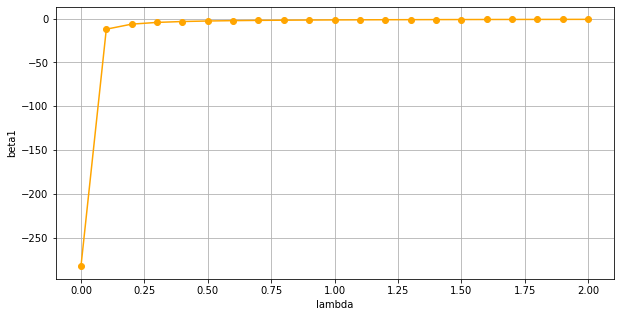

In [568]:
plot_lambda_beta(lambdas, beta_1, 1)

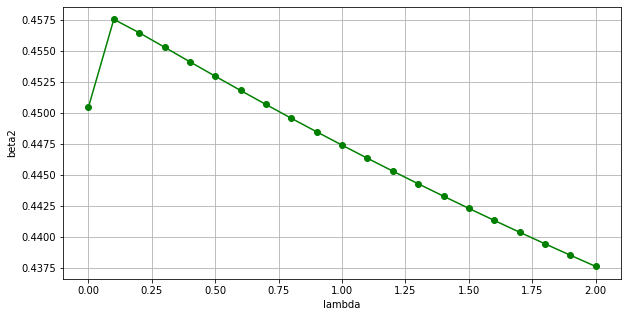

In [569]:
plot_lambda_beta(lambdas, beta_2, 2, 'green')

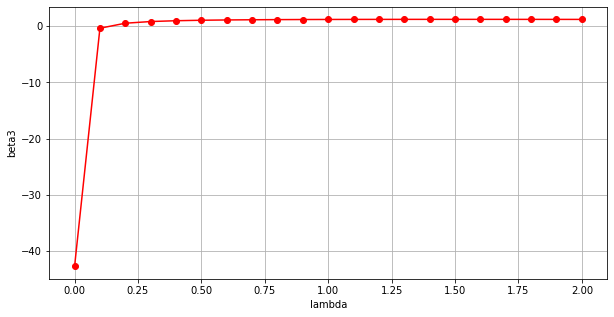

In [570]:
plot_lambda_beta(lambdas, beta_3, 3, 'red')

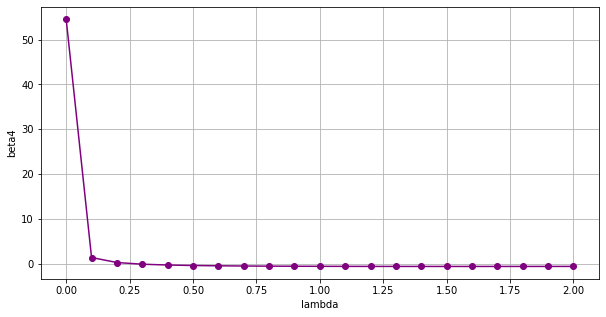

In [571]:
plot_lambda_beta(lambdas, beta_4, 4, 'purple')

Как можно заметить, при увеличении значения $\lambda$ коэффициенты начинают уменьшаться, устремляясь к нулю.

In [515]:
beta_ridge = np.linalg.inv((XTX) + 20 * np.eye(4)) * X_train.transpose() * np.matrix(y_train).transpose()
print("beta1 =", float(beta_ridge[0][0]), ", beta2 =", float(beta_ridge[1][0]), ", beta3 =", float(beta_ridge[2][0]), ", beta4 =", float(beta_ridge[3][0]))

beta1 = -0.19573423811277124 , beta2 = 0.3729845086095906 , beta3 = 0.7320942743328538 , beta4 = -0.0796895774474749


In [516]:
beta_ridge = np.linalg.inv((XTX) + 200 * np.eye(4)) * X_train.transpose() * np.matrix(y_train).transpose()
print("beta1 =", float(beta_ridge[0][0]), ", beta2 =", float(beta_ridge[1][0]), ", beta3 =", float(beta_ridge[2][0]), ", beta4 =", float(beta_ridge[3][0]))

beta1 = -0.01585899813197003 , beta2 = 0.3364266269895351 , beta3 = 0.41285809082432656 , beta4 = 0.28181776705254546


In [583]:
beta_ridge = np.linalg.inv((XTX) + 2000 * np.eye(4)) * X_train.transpose() * np.matrix(y_train).transpose()
print("beta1 =", float(beta_ridge[0][0]), ", beta2 =", float(beta_ridge[1][0]), ", beta3 =", float(beta_ridge[2][0]), ", beta4 =", float(beta_ridge[3][0]))

beta1 = 0.008127579449894718 , beta2 = 0.3299433756602395 , beta3 = 0.3537462830259652 , beta4 = 0.3267750346874105


Таким образом, если и дальше увеличивать значения $\lambda$, значения весов будут все больше устремляться к нулю. Если взять очень большое значение $\lambda$, то все признаки буквально исключатся из модели:

In [584]:
beta_ridge = np.linalg.inv((XTX) + 200000 * np.eye(4)) * X_train.transpose() * np.matrix(y_train).transpose()
print("beta1 =", float(beta_ridge[0][0]), ", beta2 =", float(beta_ridge[1][0]), ", beta3 =", float(beta_ridge[2][0]), ", beta4 =", float(beta_ridge[3][0]))

beta1 = 0.0032604222832632946 , beta2 = 0.10059255216606584 , beta3 = 0.10312105144429397 , beta4 = 0.09885604216754622


Посмотрим на зависимость целевой переменной от признаков: 

          x2         y
x2  1.000000  0.246096
y   0.246096  1.000000


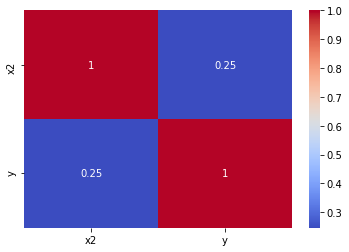

In [510]:
df = pd.DataFrame([data.x2, data.y]).transpose()
print(df.corr())
sn.heatmap(df.corr(), cmap=cm.coolwarm, annot=True)
plt.show()

          x3         y
x3  1.000000  0.380303
y   0.380303  1.000000


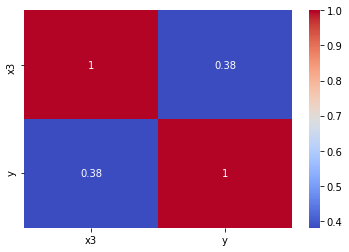

In [511]:
df = pd.DataFrame([data.x3, data.y]).transpose()
print(df.corr())
sn.heatmap(df.corr(), cmap=cm.coolwarm, annot=True)
plt.show()

          x4         y
x4  1.000000  0.383352
y   0.383352  1.000000


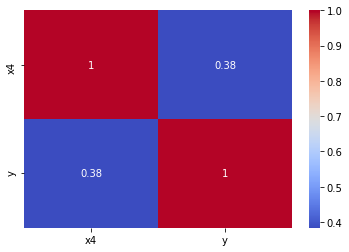

In [512]:
df = pd.DataFrame([data.x4, data.y]).transpose()
print(df.corr())
sn.heatmap(df.corr(), cmap=cm.coolwarm, annot=True)
plt.show()

Как можно заметить, особой корреляции между признаками и целевой переменной нет.

Посмотрим на зависимость значения `mse` от значения $\lambda$:

In [591]:
mse

[123.34444830015607,
 102.200026181851,
 102.0565828048432,
 102.00574087410124,
 101.97727889061092,
 101.95773027712913,
 101.94269027960965,
 101.93028965991824,
 101.91959791338414,
 101.91009819367028,
 101.90147926748023,
 101.89354161047574,
 101.88615070979152,
 101.87921202284123,
 101.87265671580164,
 101.8664331271428,
 101.86050144309012,
 101.8548302552727,
 101.84939426777542,
 101.84417272739861,
 101.8391483243969]

In [574]:
mse_scikit

[123.3444483173131,
 102.20002618220752,
 102.05658280475595,
 102.00574087400328,
 101.97727889076384,
 101.95773027700122,
 101.94269027962916,
 101.93028965985309,
 101.91959791336491,
 101.91009819376954,
 101.9014792674151,
 101.89354161044453,
 101.88615070978194,
 101.87921202288688,
 101.87265671576965,
 101.86643312712951,
 101.86050144306706,
 101.85483025529234,
 101.84939426777585,
 101.8441727273889,
 101.83914832443995]

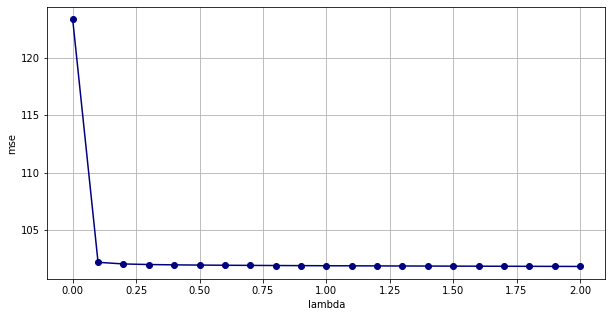

In [578]:
plt.figure(figsize=(10, 5))
plt.plot(lambdas, mse, color='navy',)
plt.plot(lambdas, mse, 'bo', color='navy')
plt.xlabel('lambda')
plt.ylabel('mse')
plt.grid(True)

Таким образом, используя Ридж-регрессию удалось несколько стабилизировать и уменьшить значения весов модели, что улучшило ее обобщающую способность и уменьшило дисперсию. Тем не менее, тружно сказать, что модель стала показывать хорошие результаты на тестовой выборке – значения `mse` все еще далеки от идеальных. Из-за очень небольшого размера выборки добиться хорошего качества на данной модели невозможно.